In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

%matplotlib inline

In [3]:
data = pd.read_csv('sentiment.csv', sep=';')
data.head()

data                     title
0  রুদ্র জাহেদ ভাই খুব ভাল লাগল আপনার মন্তব্যে অন...             Love(ভালবাসা)
1  যারা ব্লগ দিয়ে ইন্টারনেট চালানোর দাবি করেছিল ২...                Like (ভাল)
2                                  থ্যাংকস সুমন ভাই।                Like (ভাল)
3                                  থ্যাংকস সুমন ভাই।                Like (ভাল)
4                              সময়ের নিষ্ঠ প্রতিবাদ।  Consciousness (চেতনাবাদ)

In [8]:
le = LabelEncoder()
le.fit(data.title.values)

data['label'] = le.transform(data.title.values)
data.head()

data  \
0  রুদ্র জাহেদ ভাই খুব ভাল লাগল আপনার মন্তব্যে অন...   
1  যারা ব্লগ দিয়ে ইন্টারনেট চালানোর দাবি করেছিল ২...   
2                                  থ্যাংকস সুমন ভাই।   
3                                  থ্যাংকস সুমন ভাই।   
4                              সময়ের নিষ্ঠ প্রতিবাদ।   

                      title  label  
0             Love(ভালবাসা)      8  
1                Like (ভাল)      7  
2                Like (ভাল)      7  
3                Like (ভাল)      7  
4  Consciousness (চেতনাবাদ)      3

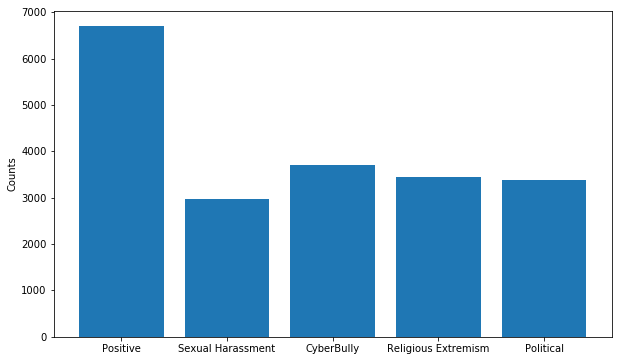

In [41]:
freq = data.label.value_counts()
freqs = [freq[x] for x in range(5)]

plt.figure(figsize=(10,6))
plt.bar([1, 2, 3, 4, 5], freqs, tick_label=['Positive', 'Sexual Harassment', 'CyberBully', 'Religious Extremism', 'Political'])
plt.ylabel('Counts')
plt.show()

In [33]:
vec = CountVectorizer(ngram_range=(1, 1))
vec.fit(data.data.values)

X = vec.transform(data.data.values)
Y = data.label

X_train = X[:20000]
Y_train = Y[:20000]

X_test = X[20000:]
Y_test = Y[20000:]

print(X.shape, Y.shape)

(27731, 4851) (27731,)


In [35]:
accs = []
#Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

acc = accuracy_score(Y_test, pred)
cnf = confusion_matrix(Y_test, pred)
print('Naive Bayes Classifier')
print('Accuracy of NB:', acc)
print('Confusion Matrix:')
print(cnf)

accs.append(acc)

Naive Bayes Classifier
Accuracy of NB: 0.298409002716
Confusion Matrix:
[[   0    0    2    0    0    0    5  208    0    0    0    0    1    0
     0   14    7    0]
 [   0    1    0    1    2    0    7  251    1    0    0    0    1    0
     1   10    4    2]
 [   0    0    0    0    0    0    2  112    1    0    0    0    0    0
     0    0   17    0]
 [   3    0    3    1    0    0    3  202    1    0    0    0    2    0
     0   29    9    2]
 [   0    0    2    1    0    2    1   96    3    0    1    0    3    0
     0    9    4    2]
 [   1    0    0    0    0    0    7  326    3    0    0    0    0    0
     0    9   20    0]
 [   1    0    4    2    0    4   21  317    2    0    2    0    2    0
     0    7   15    1]
 [   3    2    1   10    0    0   42 2184    5    0    0    8    9    0
     3   44  200    9]
 [   0    0    1    0    0    0    3  328    1    0    0    1    0    0
     0    1   51    2]
 [   0    0    0    1    0    0    3  174    2    0    0    0    2    1
 

In [36]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

acc = accuracy_score(Y_test, pred)
cnf = confusion_matrix(Y_test, pred)
print('Logistic Regression')
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)

accs.append(acc)

Logistic Regression
Accuracy: 0.309662398137
Confusion Matrix:
[[   0    5    0    0    1    0    4  208    0    2    0    0    5    0
     0    4    5    3]
 [   0    2    0    1    0    0    4  255    0    0    2    1    3    2
     1    3    6    1]
 [   0    0    0    0    0    0    3  111    2    0    1    0    1    0
     0    0   12    2]
 [   2    0    1    3    2    2    5  191    2    4    3    4    5    0
     2   16    9    4]
 [   1    1    0    1    0    1    1   99    2    0    1    0    5    0
     1   10    1    0]
 [   1    0    2    2    0    1    7  335    0    0    0    0    0    1
     1    7    6    3]
 [   0    2    3    0    0    0    4  353    0    1    0    2    2    0
     0    7    4    0]
 [   3    8    5    9    3    2   25 2338   18    5    3    6    9    1
     0   25   43   17]
 [   0    0    1    4    0    0    0  359    4    0    1    1    3    0
     0    6    8    1]
 [   1    8    4    1    0    0   14  151    0    7    4    1    7    0
     4    

In [37]:
#SVM
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

acc = accuracy_score(Y_test, pred)
cnf = confusion_matrix(Y_test, pred)
print('SVM')
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)

accs.append(acc)

SVM
Accuracy: 0.325960419092
Confusion Matrix:
[[   0    0    0    0    0    0    0  237    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  281    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  132    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  255    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  124    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  366    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  378    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0 2520    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  388    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  213    0    0    0    0    0    0
     0    0    0    0]
 [ 

In [38]:
#MLP
clf = MLPClassifier(hidden_layer_sizes=(10, ))
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

acc = accuracy_score(Y_test, pred)
cnf = confusion_matrix(Y_test, pred)
print('Multi Layer Perceptron')
print('Accuracy of MLP:', acc)
print('Confusion Matrix:')
print(cnf)

accs.append(acc)


Multi Layer Perceptron
Accuracy of MLP: 0.243823567456
Confusion Matrix:
[[   7    4    6    5    4    2   23  124    4    3    1    4    8    7
     2   12    6   15]
 [   5    8    5   15    5    0   17  156    4    6    3    2   15    2
     3    6   15   14]
 [   1    1    1    0    0    0    3   86    8    0    0    2    6    0
     1    2   15    6]
 [   6    8    1   11    2    2   18  128    3    3    7    4   14    3
     7   13   10   15]
 [  10    1    2    2    1    2    3   73    2    1    3    1    7    2
     2    6    3    3]
 [   5    4    4    2    1    4   24  242   12    3    3    7    9    3
     2    9   13   19]
 [   5    5    4    1    3    5   29  254    8    2    0    5   15    5
     0    4   17   16]
 [  39   18   36   32   15    9  115 1724   59   15   16   48   83   23
    19   42  113  114]
 [   3    1    2    3    1    0   10  294    4    1    0    5    6    0
     1   13   27   17]
 [  12    4    3    6   10    4   14   99    7    4    2    7    8    3


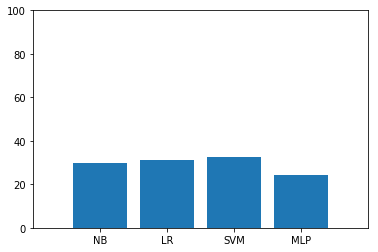

In [44]:
plt.bar([1, 2, 3, 4], [x*100 for x in accs], 0.8, tick_label=['NB', 'LR', 'SVM', 'MLP'])
plt.xlim(0, 5)
plt.ylim(0, 100)
plt.show()